In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/drive/MyDrive/python data/Customer Churn.csv"
data = pd.read_csv(file_path)

# Data Cleaning

In [3]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2765,9506-UXUSK,Male,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,931.75,No
3418,4176-FXYBO,Male,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,109.55,6118.95,No
4888,4393-RYCRE,Male,0,No,No,44,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.05,4510.8,No
5829,6933-VLYFX,Male,0,Yes,Yes,31,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,59.95,1848.8,No
1543,0330-IVZHA,Female,0,Yes,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.95,330.15,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#TotalCharges column is in object type need to convert to string
#need to remove blanks to convert from object to float
data["TotalCharges"] = data["TotalCharges"].replace([" ",""],"0")
data["TotalCharges"] = data["TotalCharges"].astype(float)
data["TotalCharges"].sample(5)

,TotalCharges
1764,4676.70
4586,8672.45
4566,6754.35
6336,4018.35
3170,2688.45


In [6]:
#to find any duplicate records in the dataset
data["customerID"].duplicated().sum()

np.int64(0)

# Churn calculation

In [7]:
#count of person who stays under sunscription and who left
#here yes represents left and no represents person stays
data["Churn"].value_counts().reset_index()

,Churn,count
0,No,5174
1,Yes,1869


# Churn by senior citizen

In [8]:
#converting senior citizen from from binary to object
def conv(value):
  if value == 0:
    return "No"
  else:
    return "Yes"

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)
data["SeniorCitizen"].value_counts().reset_index()

,SeniorCitizen,count
0,No,5901
1,Yes,1142


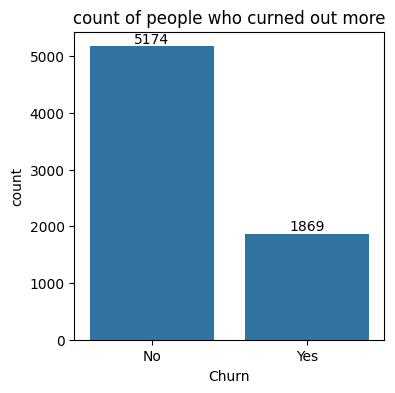

In [9]:
#count of people who curned out more
plt.figure(figsize=(4, 4))
a = sns.countplot ( x = "Churn", data = data )
a.bar_label(a.containers[0])
plt.title("count of people who curned out more")
plt.show()

In [10]:
#count of senior citizen who chruned out
x = data[data["SeniorCitizen"] == "Yes"]["Churn"].value_counts().reset_index()
#476 senior citizen has left
y = x["count"].sum()
print(x)
print((476/y)*100)

  Churn  count
0    No    666
1   Yes    476
41.68126094570928


In [11]:
#41.61% seniors are churing out

# Churn by gender

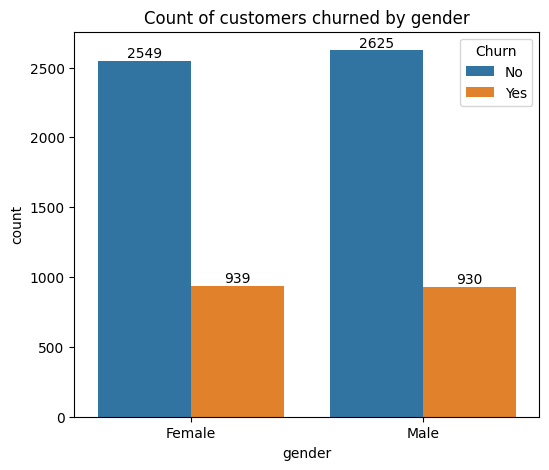

In [12]:
plt.figure(figsize= (6,5))
a = sns.countplot(x = "gender", data = data, hue = data["Churn"])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Count of customers churned by gender")
plt.show()

In [13]:
data[data["Churn"] == "Yes"]["gender"].value_counts().reset_index()

,gender,count
0,Female,939
1,Male,930


In [14]:
#we do have evidence that one gender is leaving out more when compared to another

# Churn by tenure

In [15]:
#people churing out by tenure

In [16]:
data[data["Churn"] == "Yes"]["tenure"].value_counts().reset_index().\
sort_values(by = "count", ascending = False).head(5)

,tenure,count
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64


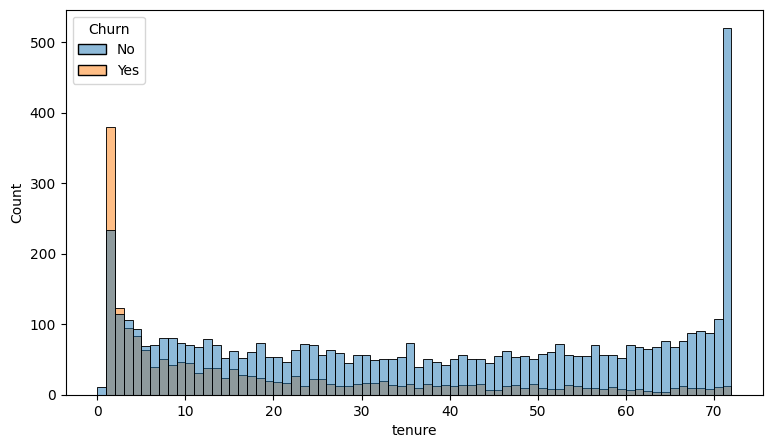

In [17]:
plt.figure(figsize=(9,5))
sns.histplot( x = "tenure", data = data, bins = 72, hue = "Churn")
plt.show()

In [18]:
#from this observation we can confirm that people who have taken shorter tenure are churing out more

In [19]:
data[data["Churn"] == "Yes"]["Contract"].value_counts().reset_index()

,Contract,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


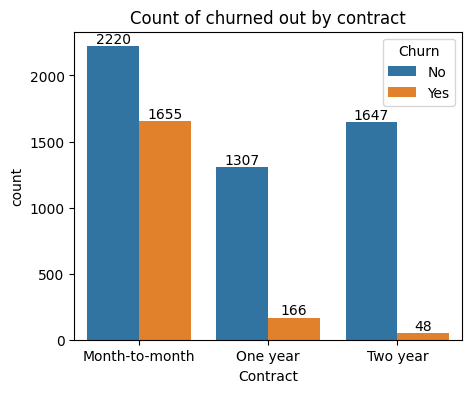

In [20]:
plt.figure( figsize = (5,4) )
a = sns.countplot( x = "Contract", data = data, hue = "Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Count of churned out by contract")
plt.show()

In [21]:
# we found out that customers who have taeken month to month subscritions are leaving more
#when compared to customers taken yearly suscription

# Payment Method

In [22]:
data[data["Churn"] == "Yes"]["PaymentMethod"].value_counts().reset_index()

,PaymentMethod,count
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer (automatic),258
3,Credit card (automatic),232


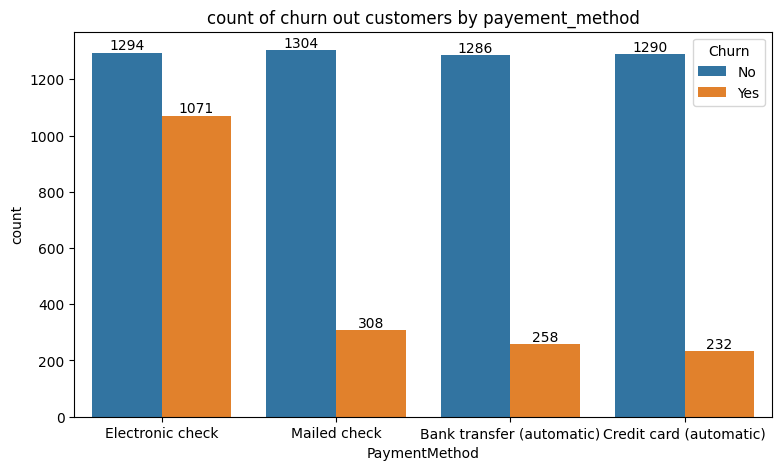

In [23]:
plt.figure( figsize = (9,5))
a = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("count of churn out customers by payement_method")
plt.show()

In [24]:
#form the above chart we find out that customer using electronic check for each payemnt
#are churing out more

# Other columns

In [25]:
#PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
#PaperlessBilling

#iam doing churn analysis i want you to create sub plot for each columns
#where each plot should be count plot

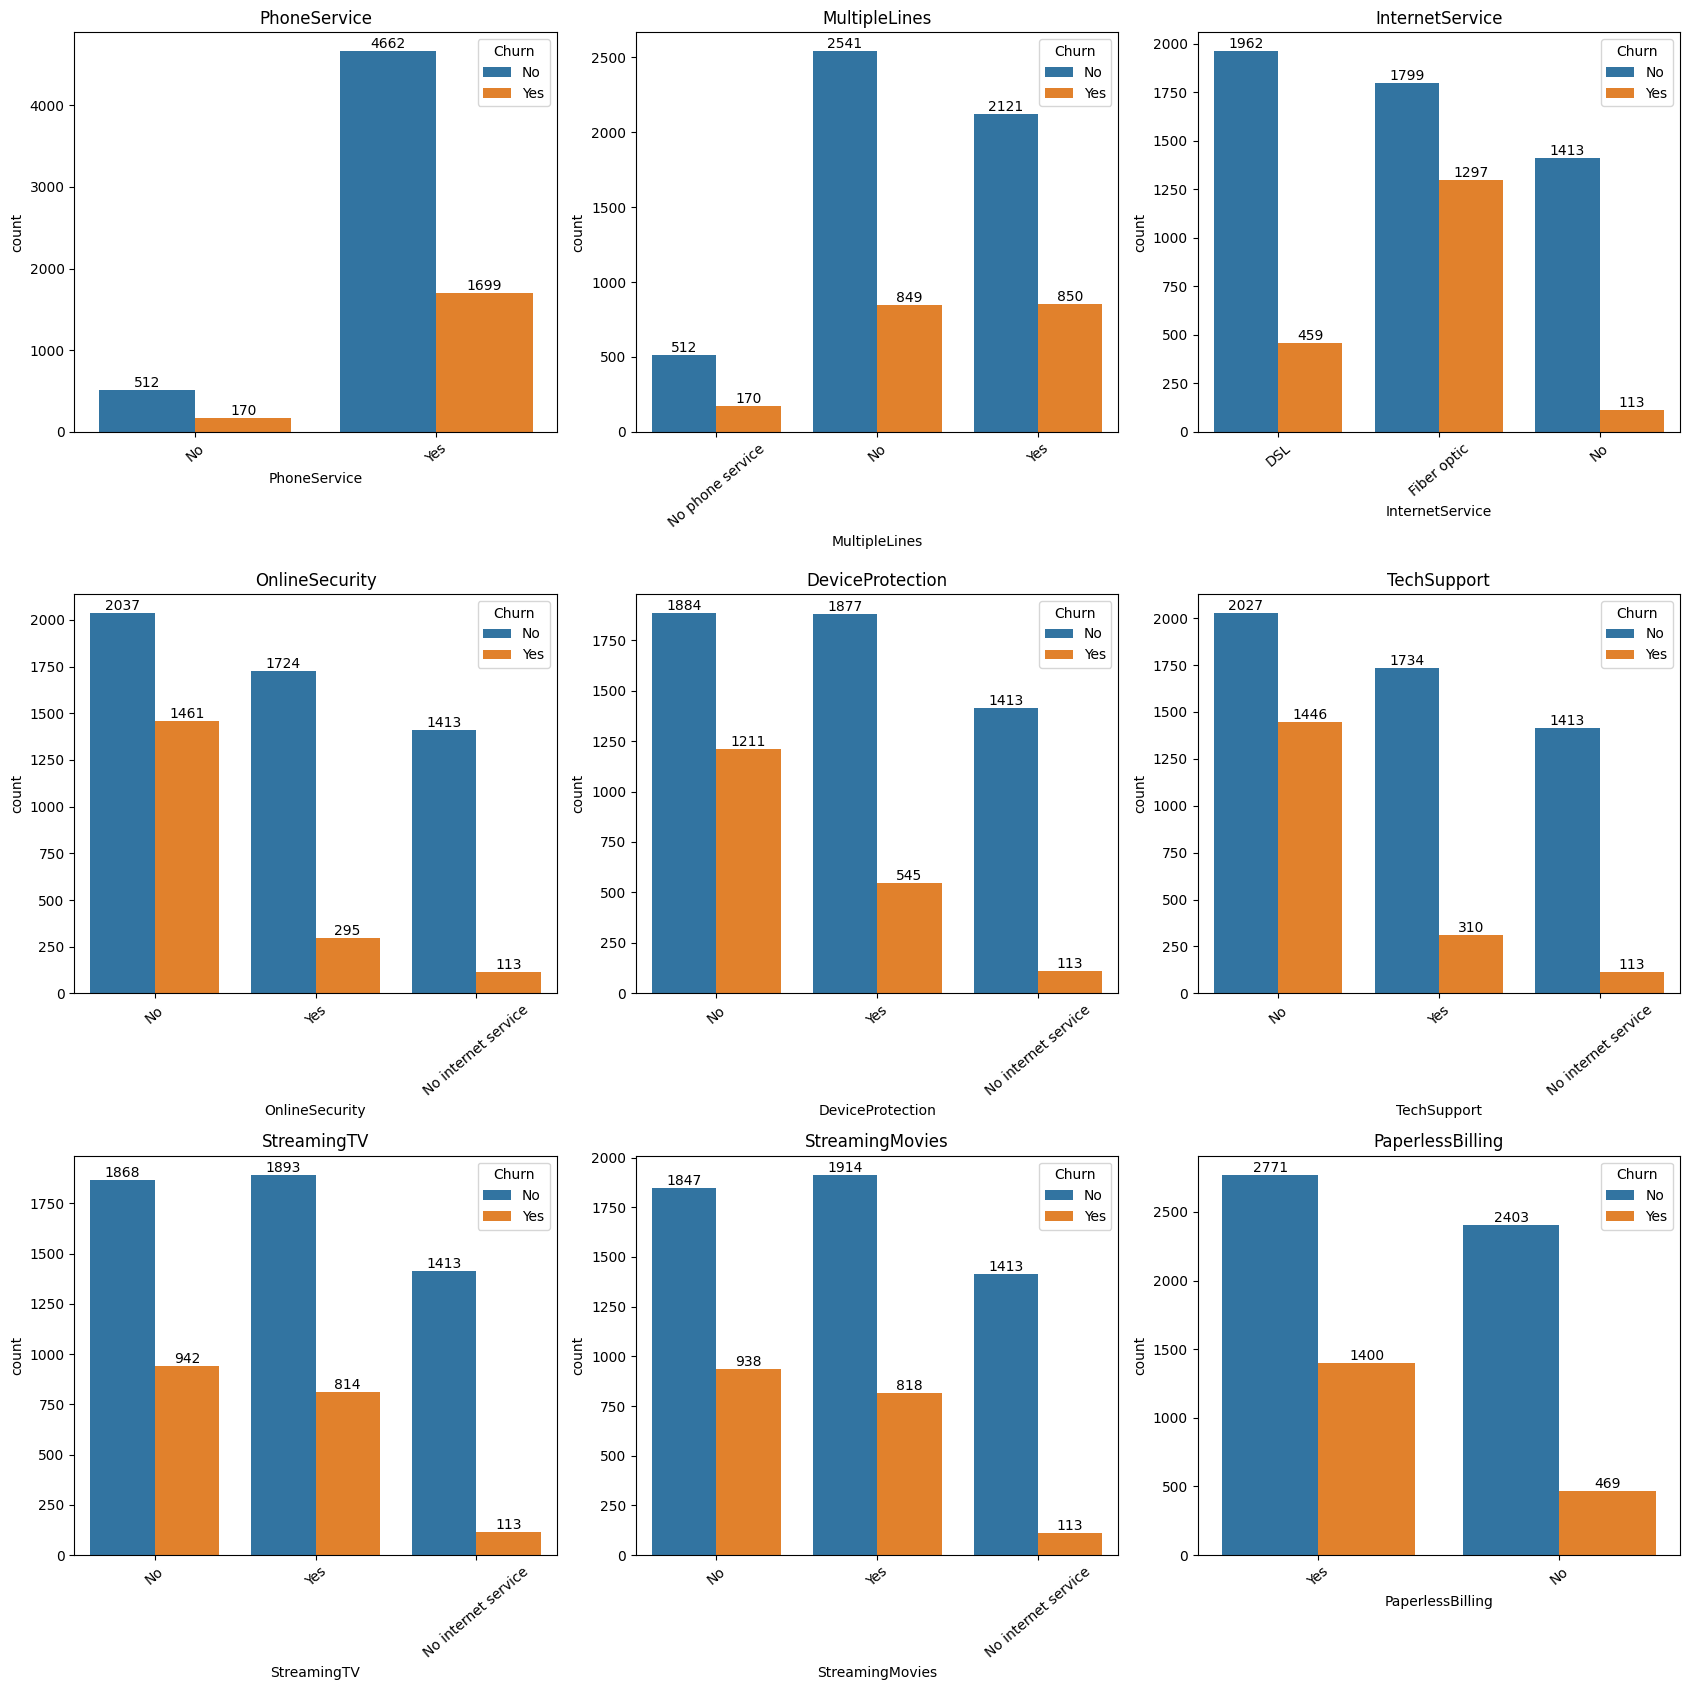

In [26]:
cols = ["PhoneService", "MultipleLines", "InternetService",
        "OnlineSecurity", "DeviceProtection", "TechSupport",
        "StreamingTV", "StreamingMovies", "PaperlessBilling"]

# take only required columns (+ Churn for analysis)
df = data[cols + ["Churn"]]

plt.figure(figsize=(17,17))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot( x= col, data = df, hue = "Churn")
    for c in ax.containers:
        ax.bar_label(c)
    plt.title(col)
    plt.xticks(rotation=40)

plt.tight_layout()
plt.show()

In [27]:
#people with phone service are leaving more
#people with fibre optics internet service are churing out more
#people who dont have online security, device protection and less tech support are churing out more
#stremimgTV and streming movies churn is higher
#people using paperless billing are churing out more